## Coursera Assignment: Linear Regression 

In [2]:
from __future__ import division, print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Creates a table data structure which is easy to manipulate
df = pd.read_csv("machine_learning_andrewng/ex1data1.csv", header=None)
df.rename(columns={0: 'population', 1: 'profit'}, inplace=True)
df.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


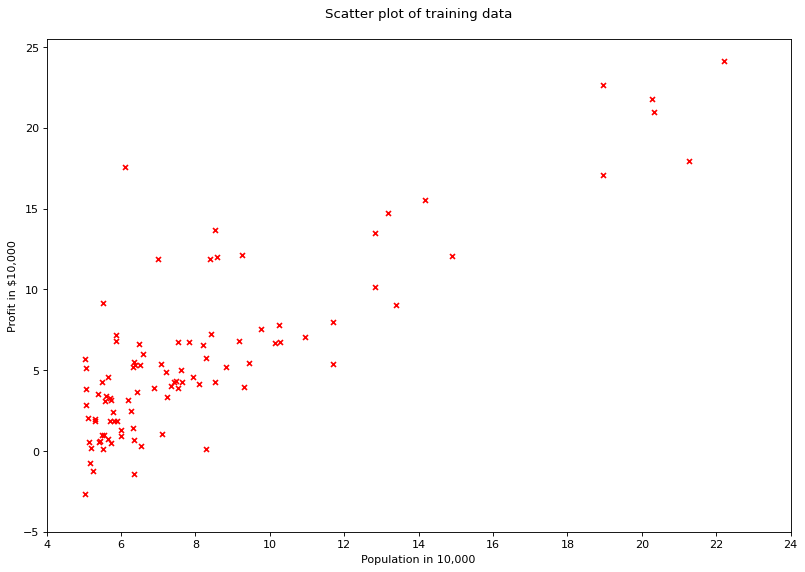

In [3]:
# visualising the data
fig = plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w')
plt.scatter(df['population'], df['profit'], marker='x', color='red', s=20)
plt.xlim([4, 24])
plt.xticks(range(4, 26, 2))
plt.yticks(range(-5, 30, 5))
plt.xlabel("Population in 10,000")
plt.ylabel("Profit in $10,000")
plt.title("Scatter plot of training data\n")
plt.show()

In [4]:
class LinearRegression(object):
    """Performs Linear Regression using Batch Gradient
    Descent."""
    def __init__(self, X, y, alpha=0.01, n_iterations=5000):
        """Initialise variables.
        
        Parameters
        ----------
        y : numpy array like, output / dependent variable
        X : numpy array like, input / independent variables
        alpha : float, int. Learning Rate
        n_iterations : Number of maximum iterations to perform
            gradient descent
        """
        self.y = y
        self.X = self._hstack_one(X)
        self.thetas = np.zeros((self.X.shape[1], 1))
        self.n_rows = self.X.shape[0]
        self.alpha = alpha
        self.n_iterations = n_iterations
        print("Cost before fitting: {0:.2f}".format(self.cost()))

    @staticmethod
    def _hstack_one(input_matrix):
        """Horizontally stack a column of ones for the coefficients
        of the bias terms
        
        Parameters
        ----------
        input_matrix: numpy array like (N x M). Where N = number of 
            examples. M = Number of features.
        
        Returns
        -------
        numpy array with stacked column of ones (N x M + 1)
        """
        return np.hstack((np.ones((input_matrix.shape[0], 1)),
                              input_matrix))

    def cost(self, ):
        """Calculates the cost of current configuration"""
        return (1 / (2 * self.n_rows)) * np.sum(
            (self.X.dot(self.thetas) - self.y) ** 2)

    def predict(self, new_X):
        """Predict values using current configuration
        
        Parameters
        ----------
        new_X : numpy array like
        """
        
        new_X = self._hstack_one(new_X)
        return new_X.dot(self.thetas)

    def batch_gradient(self, ):
        h = self.X.dot(self.thetas) - self.y
        h = np.multiply(self.X, h)
        h = np.sum(h, axis=0)
        return h.reshape(-1, 1)

    def batch_gradient_descent(self, ):
        alpha_by_m = self.alpha / self.n_rows
        for i in range(self.n_iterations):
            self.thetas = self.thetas - (alpha_by_m * self.batch_gradient())
            cost = self.cost()
            print("Iteration: {0} Loss: {1:.5f}\r".format(i + 1, cost), end="")


In [5]:
X = df['population'].values.reshape(-1, 1)
y = df['profit'].values.reshape(-1, 1)
lr = LinearRegression(X, y)
lr.batch_gradient_descent()

Cost before fitting: 32.07


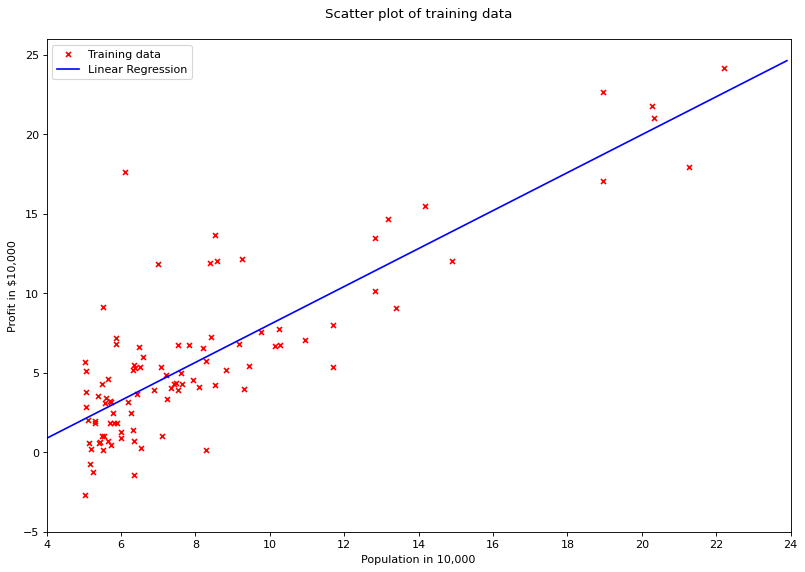

In [6]:
# plot regression line
X = np.arange(4, 24, 0.1).reshape(-1, 1)
fig = plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w')
plt.scatter(df['population'], df['profit'], marker='x', color='red', s=20, label='Training data')
plt.plot(X, lr.predict(X), color='blue', label='Linear Regression')
plt.xlim([4, 24])
plt.xticks(range(4, 26, 2))
plt.yticks(range(-5, 30, 5))
plt.xlabel("Population in 10,000")
plt.ylabel("Profit in $10,000")
plt.title("Scatter plot of training data\n")
plt.legend()
plt.show()

## Linear Regression with multiple variables


In [11]:
df = pd.read_csv("machine_learning_andrewng/ex1data2.csv", header=None)
df.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [12]:
X = df.iloc[:, [0, 1]].values
y = df.iloc[:, [2]].values

In [13]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_Y = StandardScaler()
X = scaler_X.fit_transform(X)
y = scaler_Y.fit_transform(y)

In [14]:
lr = LinearRegression(X, y, alpha=0.1, n_iterations=1000)
lr.batch_gradient_descent()

Cost before fitting: 0.50


In [15]:
X_test = np.array([2104, 3]).reshape(1, 2)
print("Testing on : {0}".format(X_test[0]))
X_test = scaler_X.transform(X_test)
prediction = lr.predict(X_test)
print("Prediction(Scaled): {0:.2f}".format(prediction[0][0]))
print("Prediction(Unscaled): {0:.2f}".format(scaler_Y.inverse_transform(prediction)[0][0]))

Testing on : [2104    3]
Prediction(Scaled): 0.13
Prediction(Unscaled): 356283.11


In [6]:
np.array([2104, 3, 2010, 2]).reshape(2, 2)

array([[2104,    3],
       [2010,    2]])